In [46]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import imageio
import eksplisitt  as eks
import ImageView as imv
import scipy.misc

import os
import colour
import colour.plotting
from colour_demosaicing import (
    EXAMPLES_RESOURCES_DIRECTORY,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

ModuleNotFoundError: No module named 'colour_demosaicing'

In [62]:
def demosaicing(file):
    original =  imageio.imread(file)
    #original = original[70::-1, 170::-1]
    
    mosaic = np. zeros(original.shape[:2]) # Alloker plass
    mosaic[ ::2 , ::2] = original[ ::2 , ::2 , 0] # R- kanal
    mosaic[1::2 , ::2] = original[1::2 , ::2 , 1] # G- kanal
    mosaic[ ::2 , 1::2] = original[ ::2 , 1::2 , 1] # G- kanal
    mosaic[1::2 , 1::2] = original[1::2 , 1::2 , 2] # B- kanal
    
    orignal = original.astype(dtype=float) / 255
    
    plt.imshow(original)
    plt.show()
    plt.imshow(mosaic, plt.cm.gray)
    plt.show()
    
    new = np.zeros(original.shape)
    new[ ::2 , ::2 , 0] = mosaic[ ::2 , ::2]
    new[1::2 , ::2 , 1] = mosaic[1::2 , ::2]
    new[ ::2 , 1::2 , 1] = mosaic[ ::2 , 1::2]
    new[1::2 , 1::2 , 2] = mosaic[1::2 , 1::2]
    newcopy = new
    
    mask = np.zeros(new.shape)     #lag maske
    mask[ ::2 , ::2 , 0] = 1
    mask[1::2 , ::2 , 1] = 1
    mask[ ::2 , 1::2 , 1] = 1
    mask[1::2 , 1::2 , 2] = 1
    
    mask = mask.astype(bool)
    new = eks.eksplisitt(new, n=20)  #løs
    new[mask] = newcopy[mask]
    
    plt.imshow(new)
    plt.show()

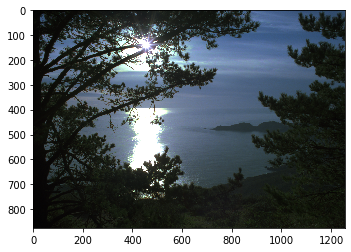

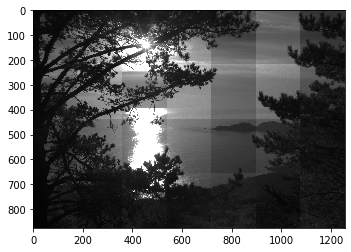

In [63]:
filepath = "..\hdr-bilder\Ocean\Ocean_00512.png"

demosaicing(filepath)